# <font color='red'>Clustering Assignment</font>

# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

In [1]:
!pip install networkx==2.3

     |████████████████████████████████| 1.8MB 17.0MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=bc465c77feb4a9b3649c55ff339aa5d99868c6b10ba215c57778f56e88cb06f8
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [2]:
!pip install stellargraph

     |████████████████████████████████| 440kB 17.3MB/s 


In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data=pd.read_csv('/content/drive/My Drive/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [6]:
edges = [tuple(x) for x in data.values.tolist()]

In [7]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [8]:
A = list(nx.connected_component_subgraphs(B))[0]

In [9]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


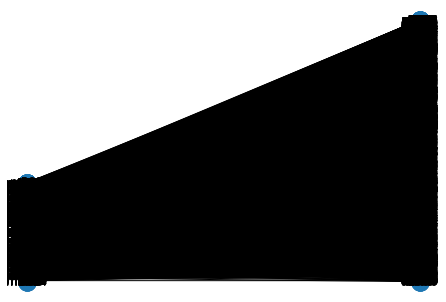

In [10]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [16]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    for index,node in enumerate(node_ids):
        if node_targets[index]=='actor':
            actor_nodes.append(node)
        else:
            movie_nodes.append(node)
    
    for index,embeddings in enumerate(node_embeddings):
        if node_targets[index]=='actor':
            actor_embeddings.append(embeddings)
        else:
            movie_embeddings.append(embeddings)
            
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Graded function - 1</font>

In [17]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Graded function - 2</font>

In [18]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [19]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1= (1/number_of_clusters)*((max(nx.connected_component_subgraphs(graph),key=len)).number_of_nodes()/graph.number_of_nodes())# calculate cost1 
    return cost1

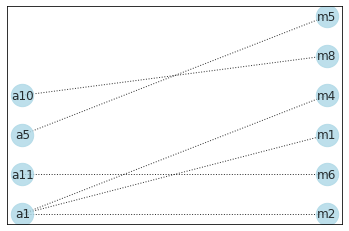

In [20]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Graded function - 3</font>

In [21]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [22]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    nodes=graph.nodes()
    actor=[]
    movie=[]
    for node in nodes:
      if 'a' in node:
        actor.append(node)
      else:
        movie.append(node)
    no_of_uniquemovienodes=len(list(set(movie)))
    sum_of_degree=sum(d for i,d in graph.degree(actor))
    cost2=(1/number_of_clusters)*(sum_of_degree/no_of_uniquemovienodes) # calculate cost2 
    
    return cost2

<font color='cyan'>Graded function - 4</font>

In [23]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [24]:
max_cost=0
for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
  kmeans=KMeans(n_clusters=number_of_clusters)
  kmeans.fit(actor_embeddings)
  cluster_labels=kmeans.labels_
  dict_of_actor_nodes=dict(zip(actor_nodes,cluster_labels))
  list_of_clusters=[]
  for cluster_number in np.unique(cluster_labels):
    cluster=[]
    for node,label in dict_of_actor_nodes.items():
      if label==cluster_number:
        cluster.append(node)
    list_of_clusters.append(cluster)
  cost_1=0
  cost_2=0
  for cluster in list_of_clusters:
    G=nx.Graph()
    for actornode in cluster:
      sub_graph=nx.ego_graph(A,actornode)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
    cost_1+=cost1(G,number_of_clusters)
    cost_2+=cost2(G,number_of_clusters)
  metric_cost=cost_1*cost_2
  if metric_cost>max_cost:
    max_cost=metric_cost
    optimal_no_of_clusters=number_of_clusters

In [25]:
optkmeans=KMeans(n_clusters=optimal_no_of_clusters)
optkmeans.fit(actor_embeddings)
lables=optkmeans.labels_

<font color='blue'>Displaying similar actor clusters</font>

In [26]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

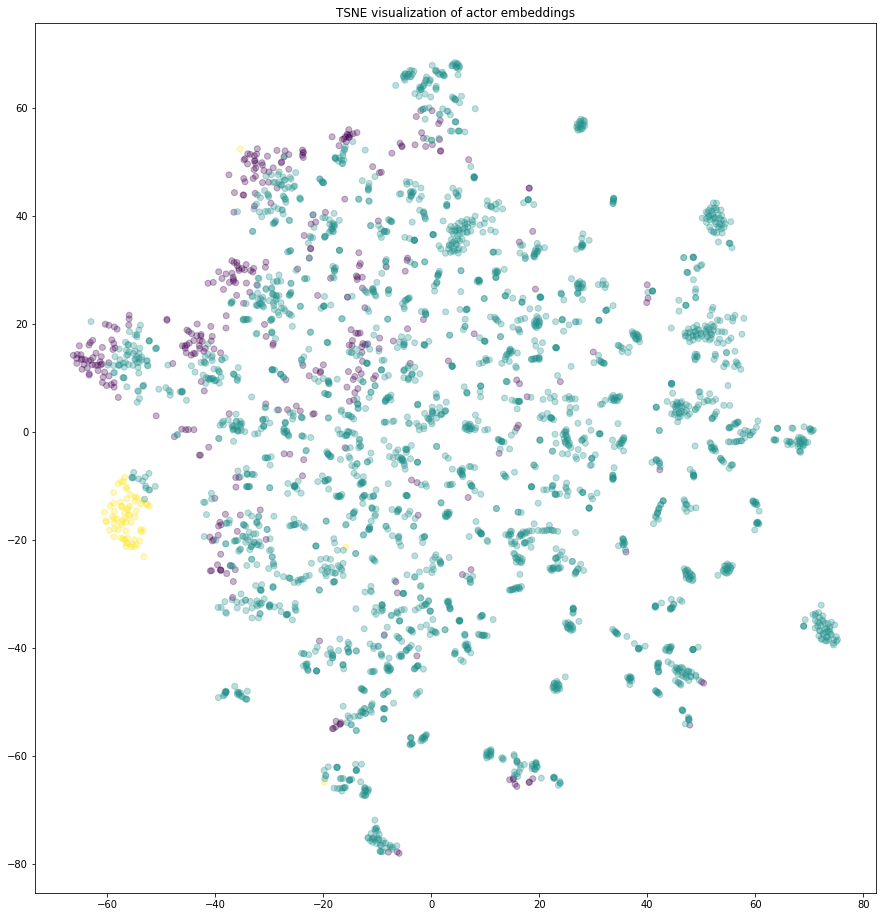

In [27]:
import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(lables))}
node_colours = [ label_map[target] for target in lables]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(actor_embeddings_2d[:,0], 
            actor_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor embeddings'.format(transform.__name__))

plt.show()

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>

<font color='blue'>Grouping similar movies</font>

In [28]:
def cost2m(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    nodes=graph.nodes()
    actor=[]
    movie=[]
    for node in nodes:
      if 'a' in node:
        actor.append(node)
      else:
        movie.append(node)
    no_of_uniqueactornodes=len(list(set(actor)))
    sum_of_degree=sum(d for i,d in graph.degree(movie))
    cost2=(1/number_of_clusters)*(sum_of_degree/no_of_uniqueactornodes) # calculate cost2 
    
    return cost2

In [29]:
max_cost=0
for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
  kmeans=KMeans(n_clusters=number_of_clusters)
  kmeans.fit(movie_embeddings)
  cluster_labels=kmeans.labels_
  dict_of_movie_nodes=dict(zip(movie_nodes,cluster_labels))
  list_of_clusters=[]
  for cluster_number in np.unique(cluster_labels):
    cluster=[]
    for node,label in dict_of_movie_nodes.items():
      if label==cluster_number:
        cluster.append(node)
    list_of_clusters.append(cluster)
  cost_1=0
  cost_2=0
  for cluster in list_of_clusters:
    G=nx.Graph()
    for movienode in cluster:
      sub_graph=nx.ego_graph(A,movienode)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
    cost_1+=cost1(G,number_of_clusters)
    cost_2+=cost2m(G,number_of_clusters)
  metric_cost=cost_1*cost_2
  if metric_cost>max_cost:
    max_cost=metric_cost
    optimal_no_of_clusters=number_of_clusters

In [30]:
optkmeans=KMeans(n_clusters=optimal_no_of_clusters)
optkmeans.fit(movie_embeddings)
lables=optkmeans.labels_

<font color='blue'>Displaying similar movie clusters</font>

In [31]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)

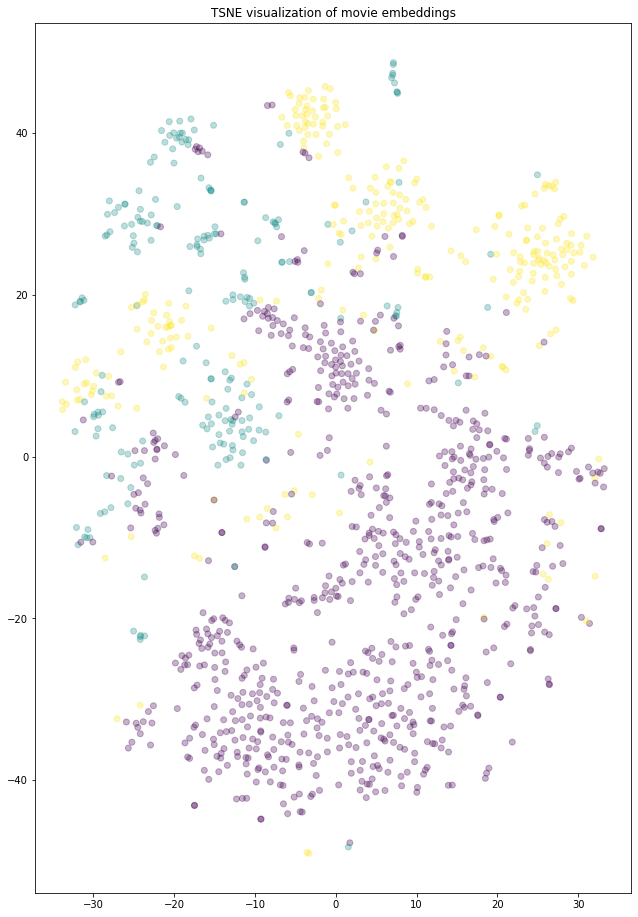

In [32]:
import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(lables))}
node_colours = [ label_map[target] for target in lables]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(movie_embeddings_2d[:,0], 
            movie_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of movie embeddings'.format(transform.__name__))

plt.show()